# Lagrange interpolating polynomials
Given equation:
\begin{align}
f(x) = \frac{1}{1 + 25x^2}
\end{align}

In [5]:
# dependency import
from matplotlib import pyplot as plt
import numpy as np
%matplotlib notebook

In [6]:
# functions
def f(x):
    return 1/(1 + 25*(x**2))

def lagrange(x, x_given, i):
    res = 1
    for x_j in x_given[:i] + x_given[i + 1:]:
        res *= (x - x_j) / (x_given[i] - x_j)
    return res

def poly_interpolate(x, x_given, y_given, n, i=0):
    if i + 1 in [len(x_given), n]: return lagrange(x, x_given, i) * y_given[i]
    return lagrange(x, x_given, i) * y_given[i] + poly_interpolate(x, x_given, y_given, n, i + 1)

In [7]:
x_given = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
y_given = [f(x) for x in x_given]

<IPython.core.display.Javascript object>


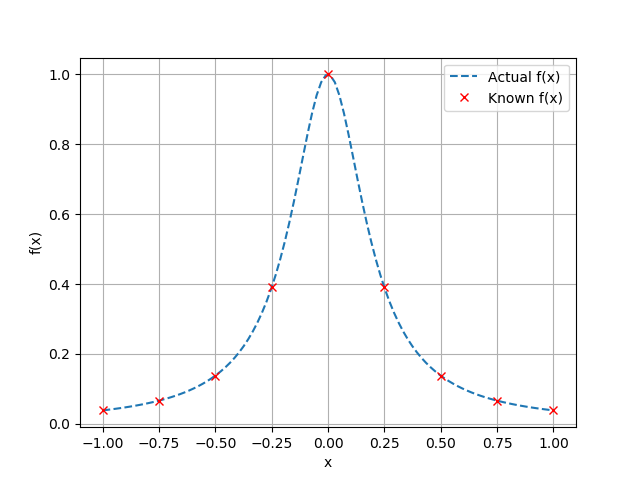

In [8]:
plt.plot(np.linspace(-1, 1, num=100), [f(x) for x in np.linspace(-1, 1, num=100)], '--', label='Actual f(x)')
plt.plot(x_given, y_given, 'x', color='red', label='Known f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

## Lagrange Interpolating polynomial

<IPython.core.display.Javascript object>


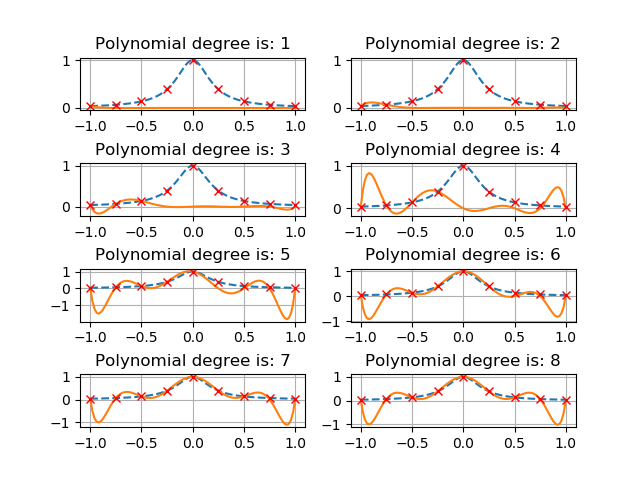

In [9]:
plt.subplots_adjust(hspace=1)
for i in range(1, 9):
    ax = plt.subplot(420 + i)
    ax.plot(np.linspace(-1, 1, num=100), [f(x) for x in np.linspace(-1, 1, num=100)], '--')
    ax.plot(np.linspace(-1, 1, num=100), [poly_interpolate(x, x_given, y_given, i) for x in np.linspace(-1, 1, num=100)])
    ax.plot(x_given, y_given, 'x', color='red', label='Known f(x)')
    plt.title('Polynomial degree is: ' + str(i))
    ax.grid()
plt.show()